In [1]:
import numpy as np
import pandas as pd
unpickled_df_1 = pd.read_pickle('controller_data_427/Data_Collection_new_controller_1.pd')
unpickled_df_1

Ticks(s)  x-acc(m/s^2)  y-acc(m/s^2)  z-acc(m/s^2)  x-vel(m/s)  \
0        3.619     -0.022291     -0.089675     -0.894110   -0.002362   
1        3.744     -0.397188      0.026650     -1.023237   -0.028893   
2        3.869     -2.786062      0.031209     -0.507150   -0.286427   
3        3.986     -4.257800      0.023061     -0.162422   -0.804064   
4        4.104     -3.919416      0.016434     -0.016302   -1.280190   
...        ...           ...           ...           ...         ...   
1483   194.106      0.862991      0.313510      0.000056   -1.823750   
1484   194.228      0.900717      0.303010     -0.000085   -1.713466   
1485   194.348      0.918758      0.286071     -0.000025   -1.601750   
1486   194.465      0.948059      0.271665      0.000015   -1.487936   
1487   194.583      0.994972      0.259891     -0.000012   -1.371774   

      y-vel(m/s)    z-vel(m/s)    x-loc(m)    y-loc(m)  x-loc-center(m)  ...  \
0      -0.008060  2.443698e-01 -119.441973  149.300760      -120.701973  ...   
1      -0.006585  1.113023e-01 -119.441714  149.300832      -120.701714  ...   
2      -0.002372  2.960553e-02 -119.457758  149.300824      -120.717758  ...   
3       0.000653  1.763320e-03 -119.527247  149.300796      -120.787247  ...   
4       0.002727 -4.012099e-03 -119.654391  149.300802      -120.914391  ...   
...          ...           ...         ...         ...              ...  ...   
1483    5.244472  9.688493e-06 -245.388941  172.751961      -245.865417  ...   
1484    5.282082  2.260008e-06 -245.635160  173.362730      -246.085495  ...   
1485    5.317416 -4.672591e-07 -245.868390  173.980534      -246.292770  ...   
1486    5.350638 -8.486940e-07 -246.088544  174.604802      -246.487000  ...   
1487    5.381696 -1.125238e-06 -246.293437  175.228366      -246.666061  ...   

      past-throttle  past_brake  past-delta(radians)  throttle  brake  \
0          0.000000         0.0             0.000000  0.688311    0.0   
1          0.688311         0.0            -0.003022  0.784054    0.0   
2          0.784054         0.0            -0.003095  0.774043    0.0   
3          0.774043         0.0            -0.003135  0.713226    0.0   
4          0.713226         0.0            -0.003162  0.682102    0.0   
...             ...         ...                  ...       ...    ...   
1483       0.303211         0.0            -0.097382  0.303115    0.0   
1484       0.303115         0.0            -0.095428  0.303075    0.0   
1485       0.303075         0.0            -0.094078  0.303051    0.0   
1486       0.303051         0.0            -0.093532  0.303040    0.0   
1487       0.303040         0.0            -0.094034  0.303048    0.0   

      delta(radians)     input  speed(m/s)  acceleration(m/s^2)          d  
0          -0.003022 -0.003022    0.008399             0.092404  -0.000000  
1          -0.003095 -0.003095    0.029634             0.398081  -3.870510  
2          -0.003135 -0.003135    0.286437             2.786237  -5.766844  
3          -0.003162 -0.003162    0.804064             4.257863  -7.477380  
4          -0.003191 -0.003191    1.280193             3.919450  -9.016508  
...              ...       ...         ...                  ...        ...  
1483       -0.095428 -0.095719    5.552526             0.918173 -16.820628  
1484       -0.094078 -0.094357    5.553049             0.950319 -16.821530  
1485       -0.093532 -0.093805    5.553424             0.962264 -16.822298  
1486       -0.094034 -0.094312    5.553673             0.986214 -16.822975  
1487       -0.095908 -0.096203    5.553775             1.028354 -16.823616  

[1488 rows x 27 columns]

In [2]:
x = np.array(unpickled_df_1['x-loc(m)'])
y = np.array(unpickled_df_1['y-loc(m)'])
x_target = np.array(unpickled_df_1['target-x-loc(m)'])
y_target = np.array(unpickled_df_1['target-y-loc(m)'])
theta = np.array(unpickled_df_1['theta(radians)'])
v = np.array(unpickled_df_1['speed(m/s)'])
d = np.array(unpickled_df_1['d'])
u = np.array(unpickled_df_1['input'])
t = np.array(unpickled_df_1['Ticks(s)'])
dx = np.divide(np.diff(x), np.diff(t))
dy = np.divide(np.diff(y), np.diff(t))
dv = np.divide(np.diff(v), np.diff(t))
dtheta = np.divide(np.diff(theta), np.diff(t))
dd = np.divide(np.diff(d), np.diff(t))
dx_p = np.multiply(v, np.cos(theta))[0:-1]
dy_p = np.multiply(v, np.sin(theta))[0:-1]
dv_p = (- 1.0954 * v - 0.007 * np.multiply(v, v) - 0.1521 * d + 3.7387)[0:-1]
dtheta_p = (np.multiply(v, u) / 2.51)[0:-1]
dd_p = (3.6 * v - 20)[0:-1]

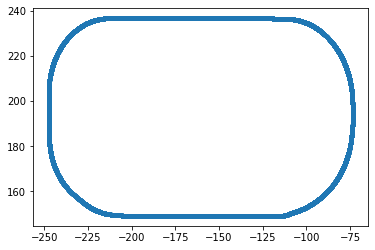

In [3]:
# create a high fidelity map
import matplotlib.pyplot as plt
from scipy import interpolate
x_unique = []
y_unique = []
for i in range(x_target.shape[0] - 1):
    if i < x_target.shape[0] - 1 and (x_target[i] != x_target[i + 1] or y_target[i] != y_target[i + 1]):
        x_unique.append(x_target[i])
        y_unique.append(y_target[i])
x_unique = x_unique[0:85]
y_unique = y_unique[0:85]
x_unique = np.array(x_unique)
y_unique = np.array(y_unique)
y_unique[0:15] = np.min(y_unique)
y_unique[82:] = np.min(y_unique)
y_unique[39:57] = np.max(y_unique)
plt.figure()
plt.plot(x_unique, y_unique, '.')
# plt.axis([-225, -200, 140, 180])
plt.plot(x_unique[19], y_unique[19], '.')
plt.plot(x_unique[33], y_unique[33], '.')
plt.plot(x_unique[62], y_unique[62], '.')
plt.plot(x_unique[76], y_unique[76], '.')
plt.show()
x_map = []
y_map = []
for j in range(2, 19):
    f = interpolate.interp1d(x_unique[j - 2:j + 3], y_unique[j - 2:j + 3], kind='cubic')
    x_temp = np.arange(x_unique[j], x_unique[j + 1], -0.01)
    y_temp = f(x_temp)
    x_temp = x_temp.tolist()
    y_temp = y_temp.tolist()
    x_map += x_temp
    y_map += y_temp
for j in range(19, 33):
    f = interpolate.interp1d(y_unique[j - 2:j + 3], x_unique[j - 2:j + 3], kind='cubic')
    y_temp = np.arange(y_unique[j], y_unique[j + 1], 0.01)
    x_temp = f(y_temp)
    x_temp = x_temp.tolist()
    y_temp = y_temp.tolist()
    x_map += x_temp
    y_map += y_temp
for j in range(33, 62):
    f = interpolate.interp1d(x_unique[j - 2:j + 3], y_unique[j - 2:j + 3], kind='cubic')
    x_temp = np.arange(x_unique[j], x_unique[j + 1], 0.01)
    y_temp = f(x_temp)
    x_temp = x_temp.tolist()
    y_temp = y_temp.tolist()
    x_map += x_temp
    y_map += y_temp
for j in range(62, 76):
    f = interpolate.interp1d(y_unique[j - 2:j + 3], x_unique[j - 2:j + 3], kind='cubic')
    y_temp = np.arange(y_unique[j], y_unique[j + 1], -0.01)
    x_temp = f(y_temp)
    x_temp = x_temp.tolist()
    y_temp = y_temp.tolist()
    x_map += x_temp
    y_map += y_temp
for j in range(76, x_unique.shape[0] - 2):
    f = interpolate.interp1d(x_unique[j - 2:j + 3], y_unique[j - 2:j + 3], kind='cubic')
    x_temp = np.arange(x_unique[j], x_unique[j + 1], -0.01)
    y_temp = f(x_temp)
    x_temp = x_temp.tolist()
    y_temp = y_temp.tolist()
    x_map += x_temp
    y_map += y_temp
x_temp = np.arange(x_map[-1], x_map[0], -0.01)
y_temp = 0 * x_temp + np.min(y_unique)
x_temp = x_temp.tolist()
y_temp = y_temp.tolist()
x_map += x_temp
y_map += y_temp
plt.figure()
plt.plot(x_map, y_map, '.')
# plt.axis([-215, -205, 145, 170])
plt.show()
x_map = np.array(x_map)
y_map = np.array(y_map)
waypoints_map = np.vstack((x_map, y_map)).T

In [139]:
# calculate cte and theta from map
theta_local = []
cte = []
theta_track = []
for i in range(x.shape[0]):
    distance = np.linalg.norm(waypoints_map - np.array([x[i], y[i]]), axis=1)
    index_tp = np.argmin(distance)
    # cte.append(distance[index_tp])
    if index_tp < x_map.shape[0] - 1:
        waypoint_vector_x = x_map[index_tp + 1] - x_map[index_tp]
        waypoint_vector_y = y_map[index_tp + 1] - y_map[index_tp]
        theta_waypoint = np.arctan2(waypoint_vector_y, waypoint_vector_x)
        theta_local.append(theta[i] - theta_waypoint)
        theta_track.append(theta_waypoint)
        start_waypoint_to_car_location_x = x[i] - x_map[index_tp]
        start_waypoint_to_car_location_y = y[i] - y_map[index_tp]
        area = -(start_waypoint_to_car_location_x * waypoint_vector_y - start_waypoint_to_car_location_y * waypoint_vector_x) / 2
        cte.append(area / np.linalg.norm(np.array([waypoint_vector_x, waypoint_vector_y]), axis=0))
    else:
        waypoint_vector_x = x_map[index_tp] - x_map[index_tp - 1]
        waypoint_vector_y = y_map[index_tp] - y_map[index_tp - 1]
        theta_waypoint = np.arctan2(waypoint_vector_y, waypoint_vector_x)
        theta_local.append(theta[i] - theta_waypoint)
cte = np.array(cte)
theta_local = np.array(theta_local)
theta_track = np.array(theta_track)
theta_local[theta_local > 3.1415926] = theta_local[theta_local > 3.1415926] - 3.1415926
theta_local[theta_local > 3] = theta_local[theta_local > 3] - 3.1415926
theta_local[theta_local < -3.1415926] = theta_local[theta_local < -3.1415926] + 3.1415926
theta_local[theta_local < -3] = theta_local[theta_local < -3] + 3.1415926
dtheta_track = np.diff(theta_track)
dtheta_track[dtheta_track > 3.1415926] = dtheta_track[dtheta_track > 3.1415926] - 3.1415926
dtheta_track[dtheta_track > 3] = dtheta_track[dtheta_track > 3] - 3.1415926
dtheta_track[dtheta_track < -3.1415926] = dtheta_track[dtheta_track < -3.1415926] + 3.1415926
dtheta_track[dtheta_track < -3] = dtheta_track[dtheta_track < -3] + 3.1415926

dtheta = np.divide(np.diff(theta_local), np.diff(t))
dtheta_track = np.divide(dtheta_track, np.diff(t))
dcte = np.divide(np.diff(cte), np.diff(t))
dcte_p = np.multiply(v, np.sin(theta_local))[0:-1]
dtheta_p = dtheta_p - dtheta_track

difference_matrix = np.vstack((dcte - dcte_p, dv - dv_p, dtheta - dtheta_p, dd - dd_p))
norm = np.linalg.norm(difference_matrix, axis=0)
filtered_data = norm[np.abs(norm) < 1.00]
print(np.max(filtered_data[200:]))

# plt.figure('cte')
# plt.xlabel('time')
# plt.ylabel('dcte')
# plt.plot(theta)
# plt.plot(theta_track)
# plt.plot(theta_local)
# plt.legend(("theta_car", "theta_track", "theta"))
# plt.show()


0.35985798311966305


In [132]:
# calculate cte and theta from map
# i = 0
# previous_x = x_target[0]
# previous_y = y_target[0]
# previous_target_x = np.zeros_like(x_target)
# previous_target_y = np.zeros_like(y_target)
# while x_target[i] == previous_x and y_target[i] == previous_y:
#     i += 1
# previous_target_x[0:i] = previous_x
# previous_target_y[0:i] = previous_y
# x_target[0:i] = x_target[i + 1]
# y_target[0:i] = y_target[i + 1]print(x_unique)
# for j in range(i, x_target.shape[0]):
#     previous_target_x[j] = previous_x
#     previous_target_y[j] = previous_y
#     if j == x_target.shape[0] - 1:
#         break
#     if x_target[j] != x_target[j + 1] or y_target[j] != y_target[j + 1]:
#         previous_x = x_target[j]
#         previous_y = y_target[j]

# waypoint_vector_x = x_target - previous_target_x
# waypoint_vector_y = y_target - previous_target_y
# theta_waypoint = np.arctan2(waypoint_vector_y, waypoint_vector_x)
# theta_local = theta - theta_waypoint
# theta_local[theta_local > 3.1415926] = theta_local[theta_local > 3.1415926] - 3.1415926
# theta_local[theta_local > 3] = theta_local[theta_local > 3] - 3.1415926
# theta_local[theta_local < -3.1415926] = theta_local[theta_local < -3.1415926] + 3.1415926
# theta_local[theta_local < -3] = theta_local[theta_local < -3] + 3.1415926

# start_waypoint_to_car_location_x = x - previous_target_x
# start_waypoint_to_car_location_y = y - previous_target_y
# area = -(start_waypoint_to_car_location_x * waypoint_vector_y - start_waypoint_to_car_location_y * waypoint_vector_x) / 2
# cte = area / np.linalg.norm(np.vstack((waypoint_vector_x, waypoint_vector_y)), axis=0)
# print(cte)

# dtheta = np.divide(np.diff(theta_local), np.diff(t))
# dcte = np.divide(np.diff(cte), np.diff(t))
# dcte_p = np.multiply(v, np.sin(theta_local))[0:-1]


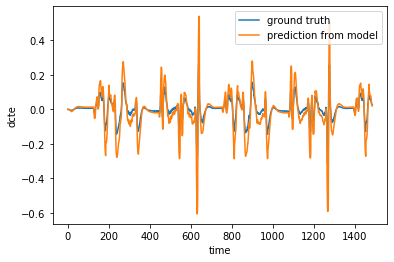

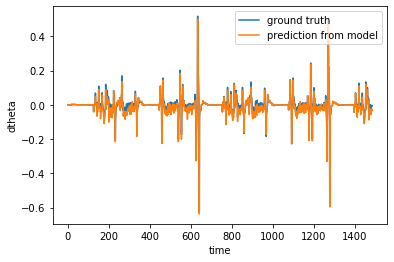

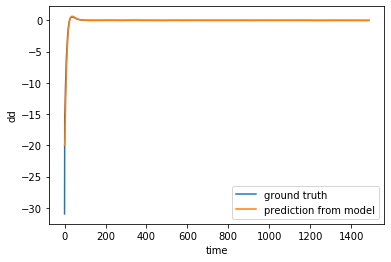

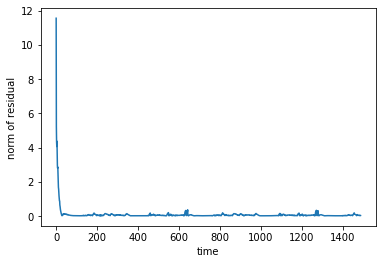

In [133]:
import matplotlib.pyplot as plt

# plt.figure('x')
# plt.xlabel('time')
# plt.ylabel('x')
# plt.plot(dx)
# plt.plot(dx_p)
# plt.legend(("ground truth", "prediction from model"))
# plt.show()

# plt.figure('y')
# plt.xlabel('time')
# plt.ylabel('y')
# plt.plot(dy)
# plt.plot(dy_p)
# plt.legend(("ground truth", "prediction from model"))
# plt.show()

plt.figure('cte')
plt.xlabel('time')
plt.ylabel('dcte')
plt.plot(dcte)
plt.plot(dcte_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('v')
plt.xlabel('time')
plt.ylabel('dv')
plt.plot(dv)
plt.plot(dv_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('theta')
plt.xlabel('time')
plt.ylabel('dtheta')
plt.plot(dtheta)
plt.plot(dtheta_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure('d')
plt.xlabel('time')
plt.ylabel('dd')
plt.plot(dd)
plt.plot(dd_p)
plt.legend(("ground truth", "prediction from model"))
plt.show()

plt.figure()
plt.xlabel('time')
plt.ylabel('norm of residual')
plt.plot(norm)
plt.show()


In [4]:
# concatenate the data frames together
import glob

files = glob.glob('Data_Collection_new_controller_*.pd')
df = []
j = 1
for fp in files:
    print(j)
    j += 1
    current_dataframe = pd.read_pickle(fp)
    x = np.array(current_dataframe['x-loc(m)'])
    y = np.array(current_dataframe['y-loc(m)'])
    theta = np.array(current_dataframe['theta(radians)'])
    t = np.array(current_dataframe['Ticks(s)'])
    # calculate cte and theta from map
    theta_local = []
    cte = []
    theta_track = []
    for i in range(x.shape[0]):
        distance = np.linalg.norm(waypoints_map - np.array([x[i], y[i]]), axis=1)
        index_tp = np.argmin(distance)
        if index_tp < x_map.shape[0] - 1:
            waypoint_vector_x = x_map[index_tp + 1] - x_map[index_tp]
            waypoint_vector_y = y_map[index_tp + 1] - y_map[index_tp]
            theta_waypoint = np.arctan2(waypoint_vector_y, waypoint_vector_x)
            theta_local.append(theta[i] - theta_waypoint)
            theta_track.append(theta_waypoint)
            start_waypoint_to_car_location_x = x[i] - x_map[index_tp]
            start_waypoint_to_car_location_y = y[i] - y_map[index_tp]
            area = -(start_waypoint_to_car_location_x * waypoint_vector_y - start_waypoint_to_car_location_y * waypoint_vector_x) / 2
            cte.append(area / np.linalg.norm(np.array([waypoint_vector_x, waypoint_vector_y]), axis=0))
        else:
            waypoint_vector_x = x_map[index_tp] - x_map[index_tp - 1]
            waypoint_vector_y = y_map[index_tp] - y_map[index_tp - 1]
            theta_waypoint = np.arctan2(waypoint_vector_y, waypoint_vector_x)
            theta_local.append(theta[i] - theta_waypoint)
            theta_track.append(theta_waypoint)
            start_waypoint_to_car_location_x = x[i] - x_map[index_tp]
            start_waypoint_to_car_location_y = y[i] - y_map[index_tp]
            area = -(start_waypoint_to_car_location_x * waypoint_vector_y - start_waypoint_to_car_location_y * waypoint_vector_x) / 2
            cte.append(area / np.linalg.norm(np.array([waypoint_vector_x, waypoint_vector_y]), axis=0))
    theta_local = np.array(theta_local)
    theta_track = np.array(theta_track)
    theta_local[theta_local > 3.1415926] = theta_local[theta_local > 3.1415926] - 3.1415926
    theta_local[theta_local > 3] = theta_local[theta_local > 3] - 3.1415926
    theta_local[theta_local < -3.1415926] = theta_local[theta_local < -3.1415926] + 3.1415926
    theta_local[theta_local < -3] = theta_local[theta_local < -3] + 3.1415926
    dtheta_track = np.diff(theta_track)
    dtheta_track[dtheta_track > 3.1415926] = dtheta_track[dtheta_track > 3.1415926] - 3.1415926
    dtheta_track[dtheta_track > 3] = dtheta_track[dtheta_track > 3] - 3.1415926
    dtheta_track[dtheta_track < -3.1415926] = dtheta_track[dtheta_track < -3.1415926] + 3.1415926
    dtheta_track[dtheta_track < -3] = dtheta_track[dtheta_track < -3] + 3.1415926
    dtheta_track = np.divide(dtheta_track, np.diff(t))
    dtheta_track = dtheta_track.tolist()
    dtheta_track.append(0)
    current_dataframe['cte'] = cte
    current_dataframe['theta_e'] = theta_local.tolist()
    current_dataframe['dtheta_t'] = dtheta_track
    df.append(current_dataframe)

df = pd.concat(df, ignore_index=True)
df.to_pickle('Data_Collection_Compiled_3.pd')
x = np.array(df['x-loc(m)'])
y = np.array(df['y-loc(m)'])
print(np.min(x))
print(np.max(x))
print(np.min(y))
print(np.max(y))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
-247.92455070961321
-73.04032612273764
149.03549745808496
237.21054574414137


In [8]:
# concatenate the data frames together
# import glob

# files = glob.glob('Data_Collection_new_controller_*.pd')
# df = pd.concat([pd.read_pickle(fp) for fp in files], ignore_index=True)
# df.to_pickle('Data_Collection_Compiled.pd')
# x = np.array(df['x-loc(m)'])
# y = np.array(df['y-loc(m)'])
# print(np.min(x))
# print(np.max(x))
# print(np.min(y))
# print(np.max(y))

-247.92308669296784
-73.03971050213889
148.9945876039009
237.13860083317383
